
=== 1) Small Example: Airport Security Scanner ===

Confusion Matrix (rows=Actual, cols=Predicted)
                 Pred:Danger   Pred:Safe
Actual:Danger(1)         4           1
Actual:Safe(0)           3          12

Accuracy : 0.80  -> 'Overall correctness' (TP + TN) / All
Precision: 0.57  -> 'Trust my alarms?'   TP / (TP + FP)
Recall   : 0.80  -> 'Did I miss danger?'  TP / (TP + FN)
F1 Score : 0.67  -> Balance of Precision & Recall

Why each metric matters (in this story):
- Accuracy  : overall correctness, but can hide problems when danger is rare.
- Precision : reduces unnecessary checks (too many false alarms waste time).
- Recall    : reduces missed threats (missing a dangerous bag is risky).
- F1        : useful when you care about both false alarms and missed threats.


=== 2) Accuracy Trap: Imbalanced Data ===

Confusion Matrix (rows=Actual, cols=Predicted)
                 Pred:Danger   Pred:Safe
Actual:Danger(1)         0          10
Actual:Safe(0)           0         990

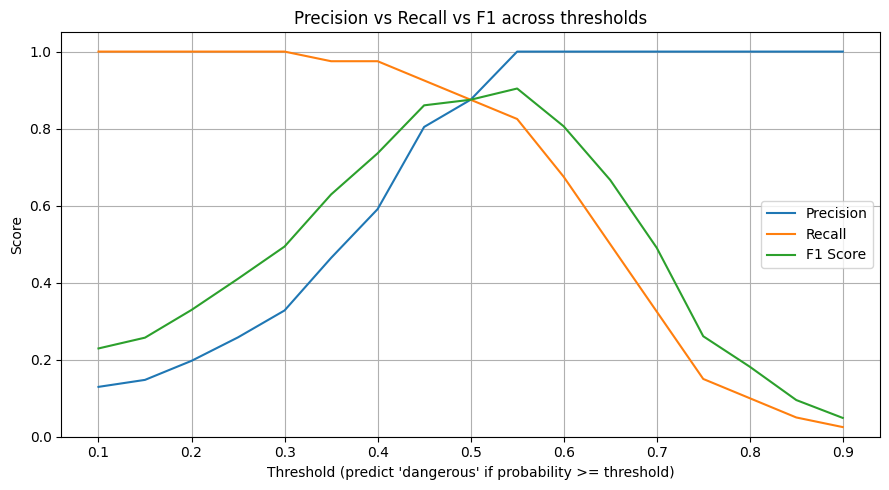


=== Memory Hooks ===

Accuracy  : Overall correctness
Precision : Trust my alarms? (reduce false alarms)
Recall    : Did I miss danger? (reduce missed threats)
F1 Score  : Balanced performance when both matter



In [4]:
#!/usr/bin/env python3
"""
ML Bytes: Classification Metrics (Accuracy, Precision, Recall, F1)

Story used in this script:
Airport Security Scanner
- Positive class (1): Bag has a dangerous item
- Negative class (0): Bag is safe

Run:
  python ml_bytes_metrics.py
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# ----------------------------
# Helper: pretty print matrix
# ----------------------------
def print_confusion_matrix(y_true, y_pred):
    """
    Confusion matrix layout (rows = actual, cols = predicted):
        [[TP, FN],
         [FP, TN]]
    where "positive" means Dangerous (1).
    """
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn = cm[0, 0], cm[0, 1]
    fp, tn = cm[1, 0], cm[1, 1]

    print("Confusion Matrix (rows=Actual, cols=Predicted)")
    print("                 Pred:Danger   Pred:Safe")
    print(f"Actual:Danger(1)     {tp:>5}       {fn:>5}")
    print(f"Actual:Safe(0)       {fp:>5}       {tn:>5}")
    print()
    return tp, fp, tn, fn


# ----------------------------
# 1) Small, easy example
# ----------------------------
print("\n=== 1) Small Example: Airport Security Scanner ===\n")

# 20 bags total:
# - 5 dangerous (1)
# - 15 safe (0)
y_true = np.array([1, 1, 1, 1, 1] + [0] * 15)

# Scanner predictions:
# - Catches 4/5 dangerous bags (misses 1)  -> TP=4, FN=1
# - Incorrectly flags 3 safe bags as dangerous -> FP=3, TN=12
y_pred = np.array(
    [1, 1, 1, 1, 0] +  # for the 5 dangerous bags
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]  # for the 15 safe bags
)

tp, fp, tn, fn = print_confusion_matrix(y_true, y_pred)

# Core metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)  # TP / (TP + FP)
recall = recall_score(y_true, y_pred, zero_division=0)        # TP / (TP + FN)
f1 = f1_score(y_true, y_pred, zero_division=0)                # harmonic mean of precision & recall

print(f"Accuracy : {accuracy:.2f}  -> 'Overall correctness' (TP + TN) / All")
print(f"Precision: {precision:.2f}  -> 'Trust my alarms?'   TP / (TP + FP)")
print(f"Recall   : {recall:.2f}  -> 'Did I miss danger?'  TP / (TP + FN)")
print(f"F1 Score : {f1:.2f}  -> Balance of Precision & Recall\n")

print("Why each metric matters (in this story):")
print("- Accuracy  : overall correctness, but can hide problems when danger is rare.")
print("- Precision : reduces unnecessary checks (too many false alarms waste time).")
print("- Recall    : reduces missed threats (missing a dangerous bag is risky).")
print("- F1        : useful when you care about both false alarms and missed threats.\n")


# ----------------------------
# 2) Accuracy can be misleading
# ----------------------------
print("\n=== 2) Accuracy Trap: Imbalanced Data ===\n")

# 1000 bags total, only 10 dangerous (1%).
n = 1000
y_true_imb = np.array([1] * 10 + [0] * (n - 10))

# A lazy model that always predicts "safe"
y_pred_all_safe = np.zeros(n, dtype=int)

tp, fp, tn, fn = print_confusion_matrix(y_true_imb, y_pred_all_safe)

acc_imb = accuracy_score(y_true_imb, y_pred_all_safe)
prec_imb = precision_score(y_true_imb, y_pred_all_safe, zero_division=0)
rec_imb = recall_score(y_true_imb, y_pred_all_safe, zero_division=0)
f1_imb = f1_score(y_true_imb, y_pred_all_safe, zero_division=0)

print(f"Accuracy : {acc_imb:.3f} (looks high because most bags are safe)")
print(f"Precision: {prec_imb:.3f}")
print(f"Recall   : {rec_imb:.3f} (caught 0 dangerous bags)")
print(f"F1 Score : {f1_imb:.3f}\n")

print("Takeaway:")
print("When positives are rare (fraud, disease, threats), accuracy alone can be a trap.\n")


# ----------------------------
# 3) Precision vs Recall tradeoff
# ----------------------------
print("\n=== 3) Precision–Recall Tradeoff (Threshold Demo) ===\n")

# Many classifiers output a probability. A higher threshold means:
# - fewer bags flagged as dangerous (often higher precision)
# - but more dangerous bags can be missed (often lower recall)

rng = np.random.default_rng(7)

# Simulate 400 bags, 40 dangerous (10%)
total = 400
pos = 40
neg = total - pos

y_true_prob = np.array([1] * pos + [0] * neg)

# Simulated probabilities:
# Dangerous bags tend to have higher probabilities than safe bags,
# but there is overlap (realistic classification).
probs_pos = rng.normal(loc=0.70, scale=0.15, size=pos).clip(0, 1)
probs_neg = rng.normal(loc=0.20, scale=0.15, size=neg).clip(0, 1)
y_prob = np.concatenate([probs_pos, probs_neg])

# Shuffle so positives/negatives aren't grouped
idx = rng.permutation(total)
y_true_prob = y_true_prob[idx]
y_prob = y_prob[idx]

thresholds = np.linspace(0.1, 0.9, 17)
prec_list, rec_list, f1_list = [], [], []

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    prec_list.append(precision_score(y_true_prob, y_pred_t, zero_division=0))
    rec_list.append(recall_score(y_true_prob, y_pred_t, zero_division=0))
    f1_list.append(f1_score(y_true_prob, y_pred_t, zero_division=0))

# Print a small table
print("threshold  precision  recall  f1")
for t, p, r, f in zip(thresholds, prec_list, rec_list, f1_list):
    print(f"  {t:0.2f}      {p:0.2f}     {r:0.2f}  {f:0.2f}")

# Plot the tradeoff (kept simple)
plt.figure(figsize=(9, 5))
plt.plot(thresholds, prec_list, label="Precision")
plt.plot(thresholds, rec_list, label="Recall")
plt.plot(thresholds, f1_list, label="F1 Score")
plt.xlabel("Threshold (predict 'dangerous' if probability >= threshold)")
plt.ylabel("Score")
plt.title("Precision vs Recall vs F1 across thresholds")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ----------------------------
# Quick memory hooks
# ----------------------------
print("\n=== Memory Hooks ===\n")
print("Accuracy  : Overall correctness")
print("Precision : Trust my alarms? (reduce false alarms)")
print("Recall    : Did I miss danger? (reduce missed threats)")
print("F1 Score  : Balanced performance when both matter\n")
